In [40]:
import pandas as pd
import numpy as np
import re

In [41]:
# problem :
#  chưa EDA 
#  chưa xử lý missing value --> thay bằng null
#  chưa check outlier và xử lý --> IQR
#  feature engineering: cụ thể cách chọn feature, feature nào quan trọng ? 

#  Hyper parameter effect on model, choose best hyper parameter
#  some main behavior of model, how to improve model
#  discovered some interesting things about data


# 'modelDate', 'model',

# 'emissionsCO2', 
# 'engineCapacity','fuelCapacity', 'vEengineType',

# 'fuelConsumption',  'height', 'length',
# 'numberOfDoors', 'numberOfForwardGears',
# 'payload', 'price', 'roofLoad', 'seatingCapacity',

# 'speed', 'torque','vEengineDisplacement', 'vEenginePower', 'weightTotal', 'wheelbase', 'width'

accelerationTime, 'brand', 'curbWeight', 'eLabel',,'cargoVolume', 'bodyType', 'driveWheelConfiguration', 'vehicleTransmission',

'fuelType',

In [42]:
df = pd.read_csv('dataset/cars_data_cleaning_17.csv')
df.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accelerationTime         26304 non-null  float64
 1   bodyType                 26304 non-null  object 
 2   brand                    26304 non-null  object 
 3   cargoVolume              26304 non-null  float64
 4   curbWeight               26304 non-null  float64
 5   driveWheelConfiguration  26304 non-null  object 
 6   eLabel                   26304 non-null  object 
 7   emissionsCO2             26304 non-null  float64
 8   engineCapacity           26304 non-null  float64
 9   fuelCapacity             26304 non-null  float64
 10  fuelConsumption          26304 non-null  float64
 11  fuelType                 26304 non-null  object 
 12  height                   26304 non-null  float64
 13  length                   26304 non-null  float64
 14  model                 

In [43]:
bodyType_list = df['bodyType'].unique().tolist()
bodyType_list.sort()
bodyType_list, len(bodyType_list)

(['2-doors, convertible',
  '2-doors, coupé',
  '2-doors, hatchback',
  '2-doors, van',
  '3-doors, convertible',
  '3-doors, coupé',
  '3-doors, hatchback',
  '3-doors, mpv',
  '3-doors, suv/crossover',
  '3-doors, van',
  '4-doors, bus',
  '4-doors, coupé',
  '4-doors, mpv',
  '4-doors, sedan',
  '4-doors, station wagon',
  '4-doors, van',
  '5-doors, bus',
  '5-doors, double cabin',
  '5-doors, hatchback',
  '5-doors, mpv',
  '5-doors, station wagon',
  '5-doors, suv/crossover',
  '5-doors, van'],
 23)

In [44]:
# bodyType
# no null value
bodyType_list = df['bodyType'].unique().tolist()
bodyType_list.sort()

for idx, value in enumerate(bodyType_list):
    df['bodyType'] = df['bodyType'].replace(value, idx)

df['bodyType']

0        13
1        13
2        13
3        13
4        13
         ..
26299     5
26300     5
26301     5
26302     5
26303     5
Name: bodyType, Length: 26304, dtype: int64

In [45]:
# brand
# no null value
brand_list = df['brand'].unique().tolist()
brand_list.sort()
print(f'Number of unique brand :{len(brand_list)}')
for idx, value in enumerate(brand_list):
    df['brand'] = df['brand'].replace(value, idx)
df['brand']


Number of unique brand :43


0        16
1        16
2        16
3        16
4        16
         ..
26299     1
26300     1
26301     1
26302     1
26303     1
Name: brand, Length: 26304, dtype: int64

In [46]:
# curbWeight
# number already
df['curbWeight'].isna().sum(), df['cargoVolume'].isna().sum()

(0, 0)

In [47]:
# driveWheelConfiguration
# driver_config_list = df['driveWheelConfiguration'].unique().tolist()
# driver_config_list.sort()

# driver_config_list


# print(f'Number of unique driver config :{len(driver_config_list)}')

# for idx, value in enumerate(driver_config_list):
#     df['driveWheelConfiguration'] = df['driveWheelConfiguration'].replace(value, idx)

# df['driveWheelConfiguration']

In [48]:
def encode_drive_config(config):
    if config == 'front':
        return [1, 0]
    elif config == 'rear':
        return [0, 1]
    elif config == 'front+rear':
        return [1, 1]
    else:
        return [0, 0]  # Default case, if needed

# Apply the encoding function to the 'driveWheelConfiguration' column
df[['driveConfig_front', 'driveConfig_rear']] = pd.DataFrame(df['driveWheelConfiguration'].apply(encode_drive_config).tolist(), index=df.index)


In [49]:
df['driveWheelConfiguration'].value_counts()

driveWheelConfiguration
front         19352
front+rear     3620
rear           3332
Name: count, dtype: int64

In [50]:
# eLabel
# have null value
elabel_list = df['eLabel'].dropna().unique().tolist()
elabel_list.sort()
print(f'Number of unique not null eLabel: {len(elabel_list)}')

for idx, value in enumerate(elabel_list):
    df['eLabel'] = df['eLabel'].replace(value, idx)

# df['eLabel'] = df['eLabel'].fillna(value=len(elabel_list))
df['eLabel']

Number of unique not null eLabel: 7


0        6
1        6
2        6
3        6
4        6
        ..
26299    6
26300    6
26301    6
26302    6
26303    6
Name: eLabel, Length: 26304, dtype: int64

In [51]:
# emission
# already number
df['emissionsCO2']

0        174.0
1        210.0
2        196.0
3        229.0
4        184.0
         ...  
26299    295.0
26300    178.0
26301    159.0
26302    159.0
26303    178.0
Name: emissionsCO2, Length: 26304, dtype: float64

In [52]:
# drop fuelType 
df = df.drop(columns=['fuelType'])

In [53]:
# # fuelType
# fuel_class = df['fuelType'].dropna().unique().tolist()
# fuel_class

In [54]:
# for idx, value in enumerate(fuel_class):
#     df['fuelType'] = df['fuelType'].replace(value, idx)

# df['fuelType']

In [55]:
# df['fuelType'].value_counts()

In [56]:
# # Gasoline / bio ethanol is same as Bio ethanol / gasoline
# num_class = len(fuel_class) - 1 + 1 # minus 1 trung + 1 null

# repair = []
# for value in df['fuelType']:
#     if value in fuel_class:
#         if value == "Bio ethanol / gasoline" or value == "Gasoline / bio ethanol":
#             repair.append(len(fuel_class) - 2)
#         else:
#             repair.append(fuel_class.index(value))
#     else:
#         repair.append(len(fuel_class) - 1)
# # print(repair[:10])
# # print( df['fuelType'].iloc[:10])
# df['fuelType'] = repair
# df['fuelType']

In [57]:
#  drop vEengineType
df = df.drop(columns=['vEengineType'])

In [58]:
# vEengineType
# not null value
# EngineType_list = df['vEengineType'].unique().tolist()
# EngineType_list.sort()
# print('list engineType: ', EngineType_list)
# print('value count: ', df['vEengineType'].value_counts())

# for idx, value in enumerate(EngineType_list):
#     df['vEengineType'] = df['vEengineType'].replace(value, idx)

# df['vEengineType']

<Axes: ylabel='count'>

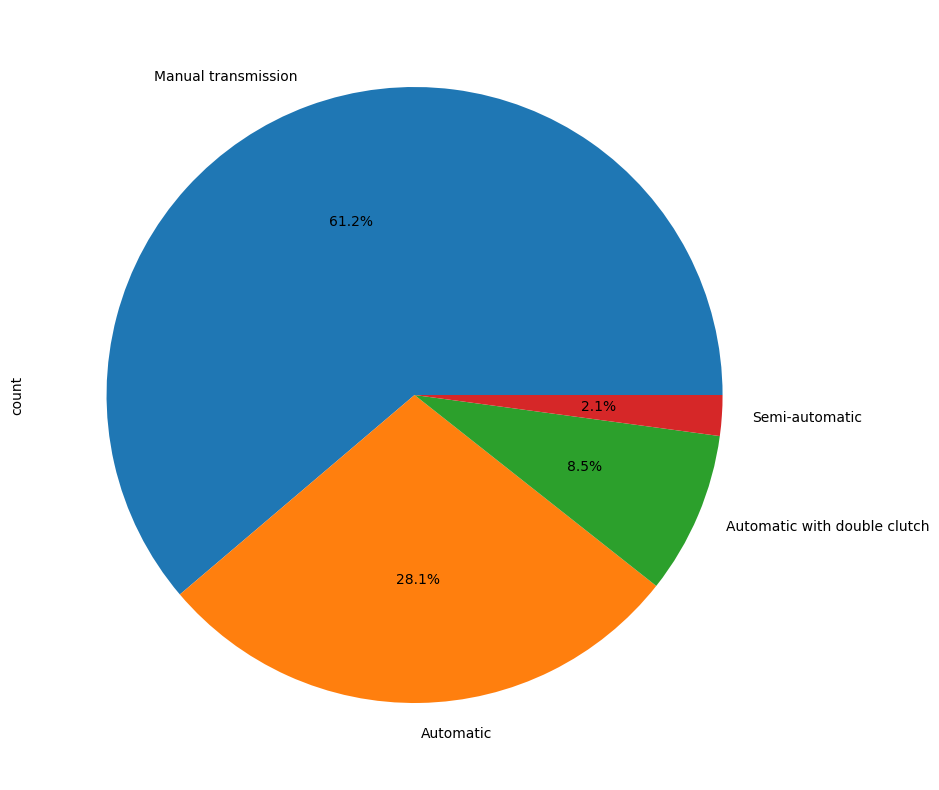

In [59]:
# pie chart of vehicleTransmission
df['vehicleTransmission'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10))

In [60]:
# vehicleTransmission
# no null value
vehicleTrans_list = df['vehicleTransmission'].unique().tolist()
vehicleTrans_list.sort()

print('unique list: ', vehicleTrans_list)
print('value count: ', df['vehicleTransmission'].value_counts())
for idx, value in enumerate(vehicleTrans_list):
    df['vehicleTransmission'] = df['vehicleTransmission'].replace(value, idx)

df['vehicleTransmission']


unique list:  ['Automatic', 'Automatic with double clutch', 'Manual transmission', 'Semi-automatic']
value count:  vehicleTransmission
Manual transmission             16101
Automatic                        7404
Automatic with double clutch     2239
Semi-automatic                    560
Name: count, dtype: int64


0        2
1        0
2        2
3        0
4        2
        ..
26299    2
26300    2
26301    2
26302    2
26303    2
Name: vehicleTransmission, Length: 26304, dtype: int64

In [61]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accelerationTime         26304 non-null  float64
 1   bodyType                 26304 non-null  int64  
 2   brand                    26304 non-null  int64  
 3   cargoVolume              26304 non-null  float64
 4   curbWeight               26304 non-null  float64
 5   driveWheelConfiguration  26304 non-null  object 
 6   eLabel                   26304 non-null  int64  
 7   emissionsCO2             26304 non-null  float64
 8   engineCapacity           26304 non-null  float64
 9   fuelCapacity             26304 non-null  float64
 10  fuelConsumption          26304 non-null  float64
 11  height                   26304 non-null  float64
 12  length                   26304 non-null  float64
 13  model                    26304 non-null  object 
 14  modelDate             

In [62]:
df['model'].value_counts()

model
Audi A3                     437
BMW 3-series                365
Audi A3 Sportback           357
Opel Corsa                  352
Mercedes-Benz C-class       327
                           ... 
Toyota MR2                    1
Mitsubishi Space Wagon        1
Mitsubishi Outlander Van      1
Fiat Punto Cabrio             1
Mitsubishi Pajero Pinin       1
Name: count, Length: 724, dtype: int64

In [63]:
df.to_csv('convert_number_data.csv', index=False)

In [64]:
model_list = df['model'].unique().tolist()
model_list.sort()
print('unique list: ', model_list)
print('value count: ', df['model'].value_counts())
for idx, value in enumerate(model_list):
    df['model'] = df['model'].replace(value, idx)

unique list:  ['Abarth 595', 'Abarth 595 Cabrio', 'Alfa Romeo 147', 'Alfa Romeo 159', 'Alfa Romeo 159 Sportwagon', 'Alfa Romeo 166', 'Alfa Romeo Brera', 'Alfa Romeo GT', 'Alfa Romeo Giulietta', 'Audi A1', 'Audi A1 Sportback', 'Audi A2', 'Audi A3', 'Audi A3 Cabriolet', 'Audi A3 Limousine', 'Audi A3 Sportback', 'Audi A4', 'Audi A4 Allroad', 'Audi A4 Avant', 'Audi A4 allroad', 'Audi A5 Cabriolet', 'Audi A5 Coupe', 'Audi A5 Sportback', 'Audi A6', 'Audi A6 Allroad', 'Audi A6 Avant', 'Audi A6 allroad', 'Audi A7 Sportback', 'Audi A8', 'Audi Q2', 'Audi Q3', 'Audi Q3 Sportback', 'Audi Q5', 'Audi RS3 Sportback', 'Audi S1', 'Audi S1 Sportback', 'Audi S3', 'Audi S3 Cabriolet', 'Audi S3 Limousine', 'Audi S3 Sportback', 'Audi S4', 'Audi S4 Avant', 'Audi S5 Cabriolet', 'Audi S5 Coupe', 'Audi S5 Sportback', 'Audi TT Coupe', 'Audi TT Roadster', 'BMW 1-series', 'BMW 1-series Coupe', 'BMW 2-series Active Tourer', 'BMW 2-series Cabrio', 'BMW 2-series Coupe', 'BMW 2-series Gran Coupe', 'BMW 2-series Gran T

In [65]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   accelerationTime         26304 non-null  float64
 1   bodyType                 26304 non-null  int64  
 2   brand                    26304 non-null  int64  
 3   cargoVolume              26304 non-null  float64
 4   curbWeight               26304 non-null  float64
 5   driveWheelConfiguration  26304 non-null  object 
 6   eLabel                   26304 non-null  int64  
 7   emissionsCO2             26304 non-null  float64
 8   engineCapacity           26304 non-null  float64
 9   fuelCapacity             26304 non-null  float64
 10  fuelConsumption          26304 non-null  float64
 11  height                   26304 non-null  float64
 12  length                   26304 non-null  float64
 13  model                    26304 non-null  int64  
 14  modelDate             

In [66]:
#  save to csv 
df = df.drop(columns=['driveWheelConfiguration'])
df.to_csv('dataset/convert_number_data_18.csv', index=False)

In [67]:
df.iloc[0]

accelerationTime          11.200
bodyType                  13.000
brand                     16.000
cargoVolume              376.000
curbWeight              1068.000
eLabel                     6.000
emissionsCO2             174.000
engineCapacity          1495.000
fuelCapacity              55.000
fuelConsumption            7.300
height                  1395.000
length                  4450.000
model                    228.000
modelDate               1998.000
numberOfDoors              4.000
numberOfForwardGears       5.000
payload                  582.000
price                     14.972
roofLoad                  50.000
seatingCapacity            5.000
speed                    178.000
torque                   129.000
vEengineDisplacement    1495.000
vEenginePower             65.000
vehicleTransmission        2.000
weightTotal             1650.000
wheelbase               2550.000
width                   1700.000
driveConfig_front          1.000
driveConfig_rear           0.000
Name: 0, d